In [1]:
!pip install stable-baselines gym gym-anytrading tensorflow==1.15.0

     |████████████████████████████████| 240 kB 5.2 MB/s 
     |████████████████████████████████| 171 kB 33.9 MB/s 
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 3.8 MB 38.9 MB/s 
     |████████████████████████████████| 503 kB 52.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ed8c6f15d3367f4c607575cd94382c227da7d2a021024171a95a61171cf0729b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0

In [2]:
import gym
import gym_anytrading
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [3]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
from pandas_datareader import data
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [5]:
start = datetime.strptime('2020-01-01','%Y-%m-%d')
end = datetime.strptime('2021-06-30','%Y-%m-%d')
df = data.DataReader('MTR', start=start, end=end, data_source='yahoo')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,7.00,7.28,7.00,7.12,6.147510,13200
2020-01-03,7.25,7.43,7.18,7.31,6.311559,13800
2020-01-06,7.41,7.74,7.14,7.48,6.458339,23300
2020-01-07,7.36,7.44,7.16,7.39,6.380631,5400
2020-01-08,7.49,7.49,7.25,7.27,6.277022,3500
...,...,...,...,...,...,...
2021-06-23,6.12,6.30,5.89,6.19,5.860878,58900
2021-06-24,6.39,6.39,5.95,6.24,5.908219,40500
2021-06-25,6.26,6.44,6.16,6.31,5.974498,30000


In [6]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [7]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=2000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -13.4    |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.0441   |
---------------------------------
---------------------------------
| explained_variance | 0.0179   |
| fps                | 314      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.00345  |
---------------------------------
---------------------------------
| explained_variance | 0.048    |
| fps                | 350     

In [8]:
env = gym.make('stocks-v0',df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.570000171661377, 'total_profit': 1.0237848905264109, 'position': 0}


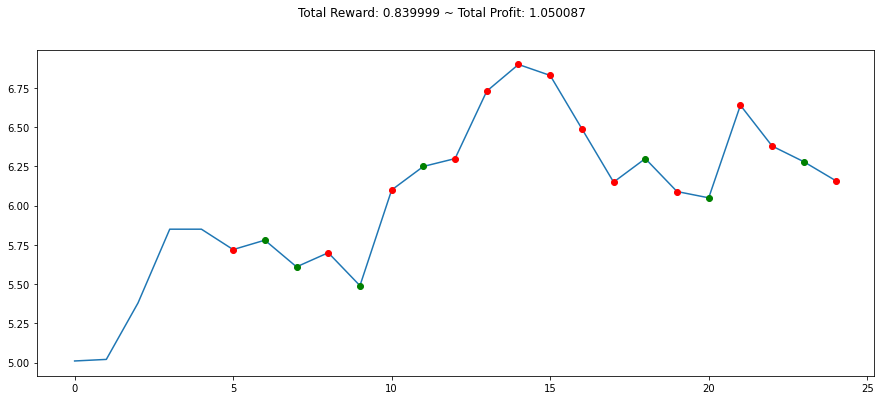

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()